
# New York City Taxi and Limousine Commission (TLC) Data Analysis

This notebook analyzes trip data from the New York City Taxi and Limousine Commission (TLC).  
**Goals**:  
1. Understand trip patterns, durations, and fares.
2. Identify key insights about passenger behavior and payment methods.
3. Apply statistical methods to uncover relationships between variables.

Let's dive into the data and explore these insights!


# Project Objectives: 

## (1) Develop a model that helps estimate taxi fares before the ride, based on data that TLC has gathered.

## (2) Develop another model to help Taxi drivers generate more revenue, by predicting wheather a customer is a generous tipper or not.

### First Milestone

Conduct exploratory data analysis on data for the TLC project. I’ll also use Power BI to create visuals for an executive summary to help non-technical stakeholders engage and interact with the data.

Methods
1. EDA and cleaning

2. Select and build visualization(s) type {Create plots to visualize relationships between relevant variables}

3. Share your results with the Automatidata team

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max.rows', 50)

In [2]:
taxi_data = pd.read_csv(r'C:\Users\HP\Downloads\Data analytics\Taxi\2017_Yellow_Taxi_Trip_Data.csv')
taxi_data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [3]:
taxi_data.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [4]:
# Adjusting column data types
taxi_data = taxi_data.astype({
    'VendorID': 'int64',
    'passenger_count': 'int64',
    'trip_distance': 'float',
    'RatecodeID': 'int64',
    'PULocationID': 'int64',
    'DOLocationID': 'int64',
    'payment_type': 'int64',
    'fare_amount': 'float',
    'extra': 'float',
    'mta_tax': 'float',
    'tip_amount': 'float',
    'tolls_amount': 'float',
    'improvement_surcharge': 'float',
    'total_amount': 'float'
})

taxi_data['tpep_pickup_datetime'] = pd.to_datetime(
    taxi_data['tpep_pickup_datetime'], 
    format='%m/%d/%Y %I:%M:%S %p'
)

taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(
    taxi_data['tpep_dropoff_datetime'], 
    format='%m/%d/%Y %I:%M:%S %p'
)

# Dropping unnecessary columns
taxi_data.drop(['Unnamed: 0'], axis=1, inplace=True)

# Calculate the pick up hour and duration of each trip in minutes
taxi_data['ride_duration_minutes'] = ((
    taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60).astype(int)

taxi_data['pickup_hour'] = taxi_data['tpep_pickup_datetime'].dt.hour % 12
taxi_data['pickup_hour'] = taxi_data['pickup_hour'].replace(0, 12)  # Replace 0 with 12
taxi_data['pickup_period'] = taxi_data['tpep_pickup_datetime'].dt.strftime('%p')
taxi_data['pickup_day_of_week'] = taxi_data['tpep_pickup_datetime'].dt.day_name().str.slice(stop=3)
taxi_data['month'] = taxi_data['tpep_pickup_datetime'].dt.month_name()

taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration_minutes,pickup_hour,pickup_period,pickup_day_of_week,month
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14,8,AM,Sat,March
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26,2,PM,Tue,April
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7,7,AM,Fri,December
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30,1,PM,Sun,May
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16,11,PM,Sat,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3,5,PM,Fri,February
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40,4,PM,Sun,August
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4,2,PM,Mon,September
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11,12,PM,Sat,July


In [5]:
#A function for catergorising each ride by time of day (morning, afternoon, evening, night and midnight) 

def categorize_time_of_day(hour, period):
    if period == 'AM':
        if 5 <= hour < 12:
            return 'Morning'
        else:  # 12 AM - 4:59 AM
            return 'Midnight'
    elif period == 'PM':
        if 1 <= hour < 5 or hour == 12:
            return 'Afternoon'
        elif 5 <= hour < 9:
            return 'Evening'
        elif 9<= hour < 12:  # 9 PM - 11:59 PM
            return 'Night'
    else:
        return 'Not_captured'

# Apply the function to create the 'time_of_day' column
taxi_data['time_of_day'] = taxi_data.apply(
    lambda row: categorize_time_of_day(row['pickup_hour'], row['pickup_period']),
    axis=1
)

In [6]:
#Rearrange the order of the columns
new_order = ['VendorID', 'time_of_day', 'passenger_count', 'trip_distance','ride_duration_minutes',
             'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID','payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge',
             'total_amount','pickup_hour','pickup_day_of_week','pickup_period','month',
             'tpep_pickup_datetime','tpep_dropoff_datetime']
taxi_data = taxi_data[new_order]

# Convert the column to a categorical type with the custom order
custom_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
taxi_data['pickup_day_of_week'] = pd.Categorical(taxi_data['pickup_day_of_week'], categories=custom_order, ordered=True)

taxi_data

,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime
0,2,Morning,6,3.34,14,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,8,Sat,AM,March,2017-03-25 08:55:43,2017-03-25 09:09:47
1,1,Afternoon,1,1.80,26,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,2,Tue,PM,April,2017-04-11 14:53:28,2017-04-11 15:19:58
2,1,Morning,1,1.00,7,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7,Fri,AM,December,2017-12-15 07:26:56,2017-12-15 07:34:08
3,2,Afternoon,1,3.70,30,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,1,Sun,PM,May,2017-05-07 13:17:59,2017-05-07 13:48:14
4,2,Night,1,4.37,16,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,11,Sat,PM,April,2017-04-15 23:32:20,2017-04-15 23:49:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,Evening,3,0.61,3,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,5,Fri,PM,February,2017-02-24 17:37:23,2017-02-24 17:40:39
22695,2,Afternoon,1,16.71,40,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,4,Sun,PM,August,2017-08-06 16:43:59,2017-08-06 17:24:47
22696,2,Afternoon,1,0.42,4,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,2,Mon,PM,September,2017-09-04 14:54:14,2017-09-04 14:58:22
22697,2,Afternoon,1,2.36,11,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,12,Sat,PM,July,2017-07-15 12:56:30,2017-07-15 13:08:26


In [7]:
taxi_data.describe()

,VendorID,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,16.526984,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,6.945460
std,0.496838,1.285231,3.653171,61.994881,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,3.351237
min,1.000000,0.000000,0.000000,-16.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,1.000000
25%,1.000000,1.000000,0.990000,6.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,4.000000
50%,2.000000,1.000000,1.610000,11.000000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,7.000000
75%,2.000000,2.000000,3.060000,18.000000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,10.000000
max,2.000000,6.000000,33.960000,1439.000000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,12.000000


In [8]:
a = taxi_data[(taxi_data['trip_distance'] <= 0 ) | (taxi_data['ride_duration_minutes'] <= 0)]

print(f'A total of {len(a)} row fall under this category')
a.head()

A total of 237 row fall under this category


,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime
128,1,Morning,1,0.00,0,3,N,231,231,2,20.0,0.0,0.0,0.0,0.0,0.3,20.3,8,Thu,AM,June,2017-06-22 08:05:33,2017-06-22 08:05:40
161,2,Evening,1,0.23,0,2,N,132,132,2,52.0,0.0,0.5,0.0,0.0,0.3,52.8,8,Sat,PM,November,2017-11-11 20:16:16,2017-11-11 20:17:14
246,1,Evening,1,0.00,0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,8,Mon,PM,September,2017-09-18 20:50:53,2017-09-18 20:51:03
291,1,Evening,1,0.00,0,1,N,132,132,2,2.5,1.0,0.5,0.0,0.0,0.3,4.3,7,Wed,PM,October,2017-10-04 19:46:24,2017-10-04 19:46:50
314,2,Midnight,6,0.12,0,1,N,161,161,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,2,Wed,AM,December,2017-12-13 02:02:39,2017-12-13 02:03:08


    Noted and comfirmed the minimum of the following 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount') all have negative values,
    which is very much abnormal in their respective contents; most likely making it a formatting mistake.
    
    There are also rows with 0 values in trip_distance or ride_duration_minutes, yet have significant values or weird values
    under columns like fare_amount, total_amount etc


In [9]:
'''I assume that negative value under those columns is a mistake, so I picked out trip_distance to study as a sample of
similar features, then looked at the most related column to it (ride_duration_minutes) to find common patterns.

    I checked for values that falls between 5 and 5.9 in (ride_duration_minutes) and confirmed my guesses.
    I was right, as tip_distance within that range are in the tenth, so I will just convert those negative numbers to
    a positive'''

taxi_data[(taxi_data['trip_distance'] < 5.9 ) & (taxi_data['trip_distance'] > 5)].head(5)

,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime
81,2,Midnight,3,5.11,16,1,N,79,74,1,16.5,0.5,0.5,5.34,0.0,0.3,23.14,4,Sat,AM,October,2017-10-28 04:16:54,2017-10-28 04:33:06
172,2,Afternoon,1,5.27,26,1,N,234,151,2,22.0,0.0,0.5,0.00,0.0,0.3,22.80,3,Sun,PM,February,2017-02-12 15:37:16,2017-02-12 16:03:24
243,2,Evening,4,5.04,26,1,N,13,230,2,21.0,0.0,0.5,0.00,0.0,0.3,21.80,7,Sun,PM,September,2017-09-24 19:44:28,2017-09-24 20:10:47
270,1,Afternoon,2,5.20,16,1,N,223,93,3,18.5,0.0,0.5,0.00,0.0,0.3,19.30,1,Sun,PM,September,2017-09-03 13:52:44,2017-09-03 14:09:06
345,2,Evening,5,5.29,34,1,N,107,238,1,23.5,0.5,0.5,4.96,0.0,0.3,29.76,8,Fri,PM,March,2017-03-17 20:02:10,2017-03-17 20:36:45


In [10]:
#Firstly, handle the negative values

taxi_data[['fare_amount', 'extra', 
           'mta_tax', 'tip_amount',
           'tolls_amount', 'improvement_surcharge',
           'total_amount']] = taxi_data[['fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount',
                                         'improvement_surcharge', 'total_amount']].abs()

#Secondly, drop any row that zero(0) under trip_distance and ride_duration_minutes
taxi_data.drop(taxi_data[(taxi_data['trip_distance'] <= 0 ) | (
    taxi_data['ride_duration_minutes'] <= 0)].index,
               inplace = True)

In [11]:
#Check the descriptive statistics of the data again

taxi_data.describe()

,VendorID,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour
count,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000
mean,1.556941,1.644911,2.939854,16.696376,1.031208,162.291648,161.459487,1.331627,12.929589,0.333363,0.498664,1.822233,0.310099,0.299987,16.199270,6.946755
std,0.496758,1.287452,3.660129,62.298188,0.227170,66.575674,70.097593,0.489719,10.760849,0.460316,0.025808,2.420594,1.388380,0.002002,13.341651,3.352151
min,1.000000,0.000000,0.010000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,4.000000
50%,2.000000,1.000000,1.640000,11.000000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000,7.000000
75%,2.000000,2.000000,3.100000,18.000000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,10.000000
max,2.000000,6.000000,33.960000,1439.000000,5.000000,265.000000,265.000000,4.000000,200.010000,4.500000,0.500000,55.500000,19.100000,0.300000,258.210000,12.000000


###### I didn't drop the rows under 'passenger_count'  that are equals to 0 (zero) because I feel reflects the times taxi cabs ride around the city looking for passengers 

In [12]:
#A function to round up number to x significant places
import math

def round_to_sig_figs(x, sig_figs):
    if x == 0:
        return 0  # Zero remains zero
    return round(x, -int(math.floor(math.log10(abs(x)))) + (sig_figs - 1))

In [13]:
#Small calculation for rides taken in the norning, afternoon and evening
# The consant number - 8760; is the amount of hours in a year

hourly_rides_am = round_to_sig_figs(taxi_data[taxi_data['time_of_day'] == 'Morning'].shape[0] / 8760,2)
hourly_rides_pm = round_to_sig_figs(taxi_data[taxi_data['time_of_day'] == 'Afternoon'].shape[0] / 8760,2)
hourly_rides_pm2 = round_to_sig_figs(taxi_data[taxi_data['time_of_day'] == 'Evening'].shape[0] / 8760,2)
hourly_revenue = taxi_data.groupby('pickup_hour')['total_amount'].sum()

Morning:    6 - 11am 
Afternoon: 12 -  4pm 
Evening:    5 -  8pm 
Night:      9 - 11pm 
Midnight:  12 -  5am


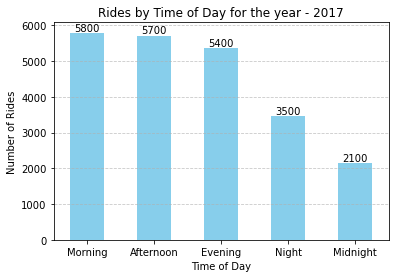

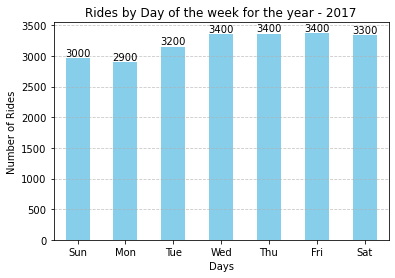

Average passenger per hour every Morning: 0.66
Average passenger per hour every Afternoon: 0.65
Average passenger per hour every Evening: 0.61


In [14]:
# Plot the bar chart for Number of rides by time of day

# Print the time ranges for context
print('Morning:    6 - 11am \nAfternoon: 12 -  4pm \nEvening:    5 -  8pm \nNight:      9 - 11pm \nMidnight:  12 -  5am')

ax = taxi_data['time_of_day'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Rides by Time of Day for the year - 2017')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


    
#Plot bar chart for the Number of rides per Day of the week
ax = taxi_data.sort_values('pickup_day_of_week')
ax = ax['pickup_day_of_week'].value_counts(sort = False).plot(kind='bar', color='skyblue')

plt.title('Rides by Day of the week for the year - 2017')
plt.xlabel('Days')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()
print(f'Average passenger per hour every Morning: {hourly_rides_am}')
print(f'Average passenger per hour every Afternoon: {hourly_rides_pm}')
print(f'Average passenger per hour every Evening: {hourly_rides_pm2}')


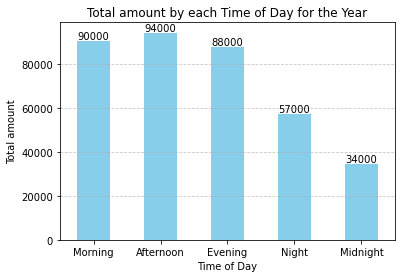

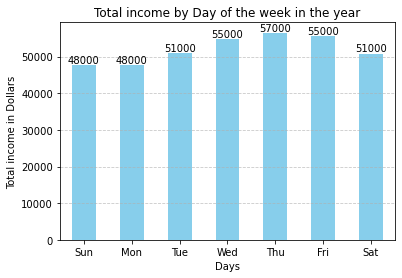

Average amount by the Time of Day 
Morning: $ 247.91 
Afternoon: $ 258.02 
Evening: $ 240.43 
Night: $ 156.57 
Midnight: $ 93.96


In [15]:
#Plot bar chart of Total amount made in each time of day
total_amt = taxi_data.groupby(['time_of_day'])['total_amount'].sum().apply(lambda x: int(x))
total_amt = total_amt.loc[['Morning','Afternoon','Evening','Night','Midnight']]
ax = total_amt.plot(kind='bar', color='skyblue')

plt.title('Total amount by each Time of Day for the Year')
plt.xlabel('Time of Day')
plt.ylabel('Total amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')    
    
plt.show()


#Plot bar chart for the Total money earn per Day of the week
ax = taxi_data.sort_values('pickup_day_of_week')
ax = ax.groupby('pickup_day_of_week')['total_amount'].sum().apply(lambda x: int(x)).plot(kind='bar', color='skyblue')

plt.title('Total income by Day of the week in the year')
plt.xlabel('Days')
plt.ylabel('Total income in Dollars')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

average_cash = (taxi_data.groupby('time_of_day').sum()/365)['total_amount'].apply(lambda x: round(x,2))
average_cash = average_cash.loc[['Morning','Afternoon','Evening','Night','Midnight']]

print(f'Average amount by the Time of Day \nMorning: $ {average_cash[0]} \nAfternoon: $ {average_cash[1]} \nEvening: $ {average_cash[2]} \nNight: $ {average_cash[3]} \nMidnight: $ {average_cash[4]}')


Based on the charts above it is safe to say 75% of the passengers acquire our services between 6am - 8pm and in these periods:

Morning pickups brought in a Total sum of 93000 Dollars for the calendar year, and an average of $255.93 daily

Afternoon pickups brought in a Total sum of 95000 Dollars for the calendar year, and an average of $261.12 daily

Evening pickups brought in a Total sum of 89000 Dollars for the calendar year, and an average of $243.68 daily

Night pickups brought in a Total sum of 58000 Dollars for the calendar year, and an average of $158.46 daily

Midnight pickups brought in a Total sum of 35000 Dollars for the calendar year, and an average of $95.16 daily


In [16]:
#Dummy dataset for more charts below to visualise more insights focused mainly on seasonality
dummy_1 = taxi_data.copy()
dummy_1['month_order'] = dummy_1['tpep_pickup_datetime'].dt.month
dummy_1['month'] = dummy_1['month'].str.slice(stop =3)
dummy_1['pickup_date'] = pd.to_datetime(taxi_data['tpep_pickup_datetime']).dt.day
dummy_1 =  dummy_1[['month_order','pickup_date','month','passenger_count','trip_distance',
                    'ride_duration_minutes','fare_amount','tip_amount', 'extra','total_amount',
                    'RatecodeID','DOLocationID']]

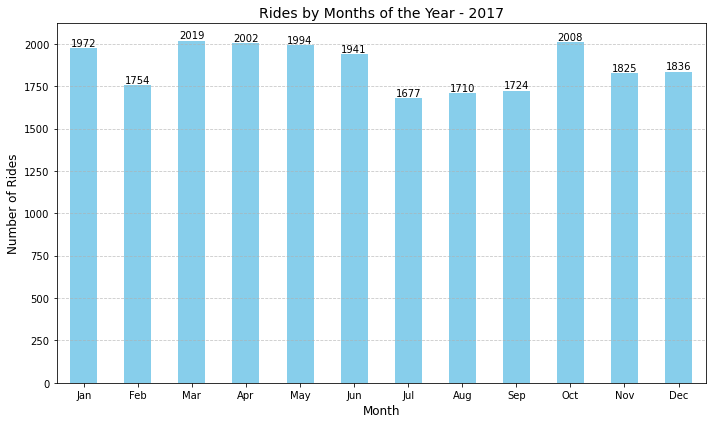

Average rides per day: 62.0
Average passenger per month: 1872.0


In [17]:
# Bar chart of Rides for each month of the Year
monthly_rides = dummy_1.groupby(['month', 'month_order']).size().reset_index(name='count')
monthly_rides = monthly_rides.sort_values('month_order')

# Plot
plt.figure(figsize=(10, 6))  
ax = monthly_rides.set_index('month')['count'].plot(kind='bar', color='skyblue')


plt.title('Rides by Months of the Year - 2017', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

b = sum(monthly_rides['count'])
print(f'Average rides per day: {round_to_sig_figs(b /365, 2)}')

print(f'Average passenger per month: {round_to_sig_figs(b/12, 4)}')

### Trip Duration Analysis

#### The histogram shows that most trips are relatively short, with a small number of outliers indicating significantly longer durations.

#### This may suggest anomalies or unique cases like traffic incidents or long-distance trips.


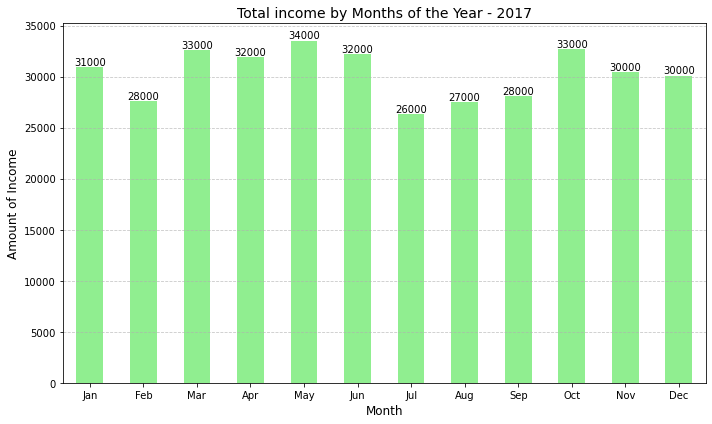

Average income per day: $ 996.9
Average distance travelled per month: 5503.0 miles


In [18]:
# Bar chart of Income for each month of the Year
monthly_income = dummy_1.groupby(['month', 'month_order'])['total_amount'].sum().reset_index(name='sum')
monthly_income = monthly_income.sort_values('month_order')

# Plot
plt.figure(figsize=(10, 6))  
bx = monthly_income.set_index('month')['sum'].plot(kind='bar', color='lightgreen')


plt.title('Total income by Months of the Year - 2017', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount of Income', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in bx.patches:
    bx.annotate(f'{round_to_sig_figs(p.get_height(),2).astype(int)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

c = sum(monthly_income['sum'])
d = dummy_1['trip_distance'].sum()
print(f'Average income per day: $ {round(c /365, 2)}')
print(f'Average distance travelled per month: {round_to_sig_figs(d/12, 4)} miles')

<Figure size 1296x720 with 0 Axes>

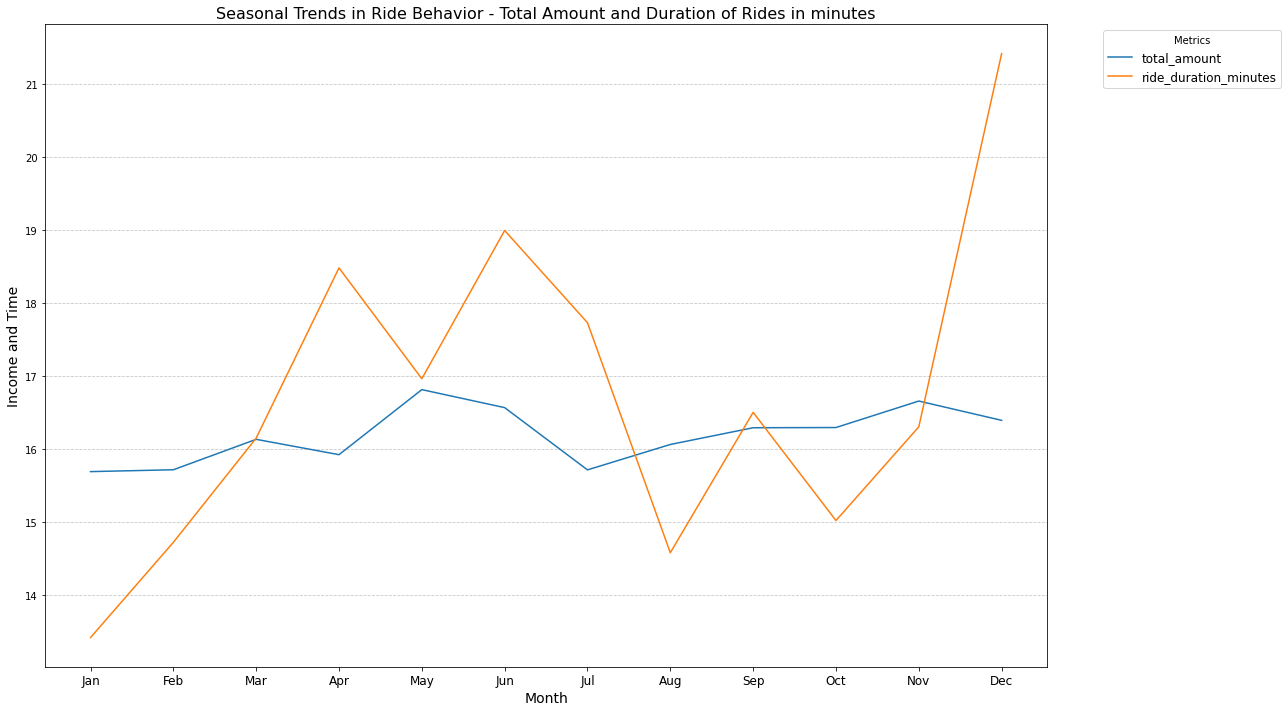

Average Trip Distance for Months with Total Amount Above Monthly Average:
   month trip_distance
4    Jan    6.49 miles
3    Feb    6.39 miles
7    Mar    6.74 miles
0    Apr    6.59 miles
8    May    6.87 miles
6    Jun    6.81 miles
5    Jul    5.99 miles
1    Aug    6.74 miles
11   Sep    6.71 miles
10   Oct    6.61 miles
9    Nov    6.55 miles
2    Dec    6.72 miles


In [19]:
# Grouping by month and calculating averages for analysis
seasonal_data = (
    dummy_1.groupby(['month', 'month_order'])[['total_amount', 'ride_duration_minutes', 'trip_distance']]
    .mean()
    .sort_values('month_order')
)

# Plotting seasonal trends
plt.figure(figsize=(18, 10))  # Make plot larger for better readability
ax = seasonal_data[['total_amount', 'ride_duration_minutes']].plot(kind='line', figsize=(18, 10))

# Adjusting aesthetics
plt.title('Seasonal Trends in Ride Behavior - Total Amount and Duration of Rides in minutes', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Income and Time', fontsize=14)
plt.xticks(ticks=range(len(seasonal_data)), labels=seasonal_data.index.get_level_values('month'), rotation=0, fontsize=12)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # Legend outside plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Finding the average distance of trip of every passager paying more than the average total amount per month
monthly_avg_total = dummy_1.groupby('month')['total_amount'].mean().reset_index()
monthly_avg_total.columns = ['month', 'avg_total_amount']
dummy_1 = dummy_1.merge(monthly_avg_total, on='month')

above_avg_trips = dummy_1[dummy_1['total_amount'] > dummy_1['avg_total_amount']]

average_trip_distance = above_avg_trips.groupby(['month', 'month_order'])['trip_distance'].mean().reset_index()
average_trip_distance = average_trip_distance.sort_values('month_order')

average_trip_distance['trip_distance'] = average_trip_distance['trip_distance'].apply(lambda x: f"{x:.2f} miles")

# Display the result
average_trip_distance = average_trip_distance[['month', 'trip_distance']]
print("Average Trip Distance for Months with Total Amount Above Monthly Average:")
print(average_trip_distance)


In [20]:
from pathlib import Path  
filepath = Path('C:/Users/HP/Downloads/Data analytics/Taxi/Taxi data Insights.xlsx')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
taxi_data.to_excel(filepath)

### Sensonality analysis

The month of March, October, April and May are the months with the most rides representively, each holding a total amount of rides of atleast 2000 rides.
From the line graph above, there are a few interesting things to speak of;

1. From March to April, the total amount of income generated seems to decline, with a significant increase of duration of rides(by minutes) during that period.


2. Come in May, the duration of rides steadly decrease while the amount of income generated climbs up; maintaining somewhat of a stable income through June, before steadly dropping as July approaches.


3. The months (March and October) seem to be the two seperate period of the year when the amount of rides increases significantly without the concern of the previous month performance. 


4. Starting June, the duration of rides makes a boorish trend to November; when it spikes up without any pull back till December. Making November and December the months with the highest duration of rides despite 8th and 7th position in term of total number of ride per month.

In [21]:
#I will dive into each month(March, October, April and May) to find out the top 3 Drop-off location
#and the Rate Code in Effect at the end of the trip, of all the Total income and tip amount above the average

In [22]:
# Identifying RatecodeID and DOlocationID with above-average Total Amount and Tip Amount in the dataset
avg_total_amount = dummy_1['total_amount'].mean()
avg_tip_amount = dummy_1['tip_amount'].mean()

ratecode_doloc_above_avg = dummy_1[
    (dummy_1['total_amount'] > avg_total_amount) & (dummy_1['tip_amount'] > avg_tip_amount)]

In [23]:
#This dataset is for Power Bi for visualising the data with total_amount and tip_amount above their average
#from pathlib import Path  
#filepath = Path('C:/Users/HP/Downloads/Data analytics/Taxi/Taxi data above tip and total_amount.xlsx')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#ratecode_doloc_above_avg.to_excel(filepath)
ratecode_doloc_above_avg

,month_order,pickup_date,month,passenger_count,trip_distance,ride_duration_minutes,fare_amount,tip_amount,extra,total_amount,RatecodeID,DOLocationID,avg_total_amount
0,3,25,Mar,6,3.34,14,13.0,2.76,0.0,16.56,1,231,16.137519
3,3,5,Mar,2,18.90,36,52.0,14.58,0.0,72.92,2,132,16.137519
12,3,17,Mar,2,11.20,22,31.5,6.56,0.5,39.36,1,180,16.137519
16,3,31,Mar,3,9.67,31,31.0,8.08,0.5,40.38,1,232,16.137519
18,3,18,Mar,2,4.10,19,17.5,3.75,0.5,22.55,1,232,16.137519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22437,9,10,Sep,1,4.60,16,16.0,3.46,0.5,20.76,1,142,16.296305
22438,9,4,Sep,1,2.70,17,13.5,2.86,0.0,17.16,1,186,16.296305
22449,9,13,Sep,1,2.74,24,16.0,3.56,1.0,21.36,1,262,16.296305
22451,9,18,Sep,1,8.80,29,28.5,4.00,0.5,33.80,1,225,16.296305


In [24]:
def get_top_dolocations_by_ratecode(data, month=None):
    """
    Get the top 3 DOLocationID for each RatecodeID based on size.
    
    Parameters:
        data (DataFrame): The dataset containing ride information.
        month (str): Optional. Filter the dataset for a specific month (e.g., 'Jan', 'Feb').
        
    Returns:
        DataFrame: A DataFrame with the top 3 DOLocationID for each RatecodeID.
    """
    if month:
        filtered_data = data[data['month'] == month]
    else:
        filtered_data = data
    
    # Group by RatecodeID and DOLocationID and get the size
    grouped = (
        filtered_data.groupby(['RatecodeID', 'DOLocationID']).size()
        .reset_index(name='count')
    )
    
    grouped = grouped.sort_values(['RatecodeID', 'count'], ascending=[True, False])
    
    # Get the top 3 DOLocationID for each RatecodeID
    top_dolocations = (
        grouped.groupby('RatecodeID').head(3).reset_index(drop=True)
    )
    
    return top_dolocations


#Form a small table with the first three location on the last column
mar_result = get_top_dolocations_by_ratecode(dummy_1, month='Mar').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

oct_result = get_top_dolocations_by_ratecode(dummy_1, month='Oct').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

apr_result = get_top_dolocations_by_ratecode(dummy_1, month='Apr').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

may_result = get_top_dolocations_by_ratecode(dummy_1, month='May').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

In [25]:
a  = mar_result.iloc[0,1]
b = oct_result.iloc[0,1]
c = apr_result.iloc[0,1]
d = may_result.iloc[0,1]

print(f"For the month of March, the three most reoccuring Dropoff location are ID:[{a}].\n" + 
      f"For the month of October;  ID[{b}].\n" +
      f"For the month of April;    ID[{c}].\n" +
      f"For the month of October;  ID[{d}].\n" +
      "With the Effect of the Standard Rate during dropoff for all for the locations")

For the month of March, the three most reoccuring Dropoff location are ID:[236, 170, 237].
For the month of October;  ID[236, 161, 237].
For the month of April;    ID[236, 161, 237].
For the month of October;  ID[142, 237, 161].
With the Effect of the Standard Rate during dropoff for all for the locations


In [26]:
#Show the frequency of all RateCodeID for rides at the time of dropoff

mar_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='Mar').groupby(
    ['RatecodeID','DOLocationID']).sum().reset_index(['RatecodeID','DOLocationID'])
mar_result_freq['month'] = 'March'

oct_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='Oct').groupby(
    ['RatecodeID','DOLocationID']).sum().reset_index(['RatecodeID','DOLocationID'])
oct_result_freq['month'] = 'October'

apr_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='Apr').groupby(
    ['RatecodeID','DOLocationID']).sum().reset_index(['RatecodeID','DOLocationID'])
apr_result_freq['month'] = 'April'

may_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='May').groupby(
    ['RatecodeID','DOLocationID']).sum().reset_index(['RatecodeID','DOLocationID'])
may_result_freq['month'] = 'May'

In [27]:
#Creating a table for the Drop-offs visit for at least 10 times and their rate code in effect
dropoff_rate_and_count = pd.concat(
    [mar_result_freq,  apr_result_freq, may_result_freq, oct_result_freq])

dropoff_rate_and_count = dropoff_rate_and_count[dropoff_rate_and_count['count'] >= 10].reset_index(drop = True)

dropoff_rate_and_count

,RatecodeID,DOLocationID,count,month
0,1,170,68,March
1,1,236,71,March
2,1,237,67,March
3,2,132,15,March
4,1,161,76,April
5,1,236,90,April
6,1,237,67,April
7,2,132,16,April
8,1,142,69,May
9,1,161,65,May


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Second Milestone

#### Population question :- Customers who use a Credit card pay higher fare amounts than those who use Cash? 

Simulate a Hypothesis test (A/B Testing):

The relationship between fare amount and payment type. 

Test the hypothesis that customers who use a credit card pay higher fare amounts.

Should you conclude that there is a statistically significant relationship between credit card payment and fare amount, discuss what the next steps should be: what are your thoughts on strategies our team could implement to encourage customers to pay with credit card?

##### The Null hypothesis is: There's no difference in average fare for customers that pay with cash or credit card.

##### The Alternative hypothesis: There's a significant difference in the average fare for customers that pay with cash or credit card.

##### Significant level (S.I):  5% (which is standard by tradition)
    
##### Since it's the aims to compare two samples mean and their population's standard deviation is unknown; I will use a T-test. Even if their sample size is more than 30

##### Lastly, following the assumption rules of hypo. testing, I will use Chi Test of Independence to test if the two variables are dependent or not - (They should not be independent)


In [28]:
taxi_data[['payment_type','fare_amount']].describe()

,payment_type,fare_amount
count,22462.000000,22462.000000
mean,1.331627,12.929589
std,0.489719,10.760849
min,1.000000,0.000000
25%,1.000000,6.500000
50%,1.000000,9.500000
75%,2.000000,14.500000
max,4.000000,200.010000


In [29]:
from scipy.stats import chi2_contingency

chi2, p, dop, expected = chi2_contingency(taxi_data[['payment_type','fare_amount']])

if p < 0.05:
    print("There is strong evidence of association, so you 'reject the null hypo.' and can not perform a t-test on the two samples")
    
elif p > 0.05:
    print("\n There is no evidence of association, so you 'fail to reject the null hypo', it is alright to use a t-test on the two samples. \n")


 There is no evidence of association, so you 'fail to reject the null hypo', it is alright to use a t-test on the two samples. 



In [30]:
# Credit card is assigned 2 and Cash is assigned 1, under payment_type from the original source

credit_card = taxi_data[taxi_data['payment_type'] == 1]['fare_amount']
cash = taxi_data[taxi_data['payment_type'] == 2]['fare_amount']


sta , p = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

if p < 0.05:
    print('''\n Based on the p-value, we will 'reject the null hypo.' and, affirm that the difference between the passengers that pay with credit card and those with cash is doesn't occuur by chance alone. \n''')
    
if p > 0.05:
    print('''\n Based on the p-value, we will ' fail to reject the null hypo.' and, affirm that the difference between the passengers that pay with credit card and those with cash is does occuur by chance indeed. \n''')


 Based on the p-value, we will 'reject the null hypo.' and, affirm that the difference between the passengers that pay with credit card and those with cash is doesn't occuur by chance alone. 



In [31]:
taxi_data.groupby('payment_type')[['fare_amount','tip_amount']].sum().reset_index('payment_type').head(2)

,payment_type,fare_amount,tip_amount
0,1,201056.41,40930.99
1,2,87437.50,0.00


##### The A/B testing result:  Customers indeed pay a higher fare amount than those that pay with cash.

##### Strategy: Customers should be encouraged to pay using Credit card to earn more revenue.

##### Note: This project requires an assumption that passengers were forced to pay one way or the other, and that once informed of this requirement, they always complied with it. The data was not collected this way; so, an assumption had to be made to randomly group data entries to perform an A/B test.

##### This dataset does not account for other likely explanations. For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa.



### Third Milestone

#### The aimed objective is to build regression and classification models and evaluate these models,  to get the model with best performance

##### The considered models for regression: Simple Linear  and  Multiple Linear  Regression models

##### The considered models for classification: Random Forest and AdaBoost Classification models

### Regression models

#### Purpose: To extract the factors in the dataset with the most influence on fare_amount, and see their degree of influence

#### Goal: To predict fare price using the most influential factors.

<Figure size 1440x720 with 0 Axes>

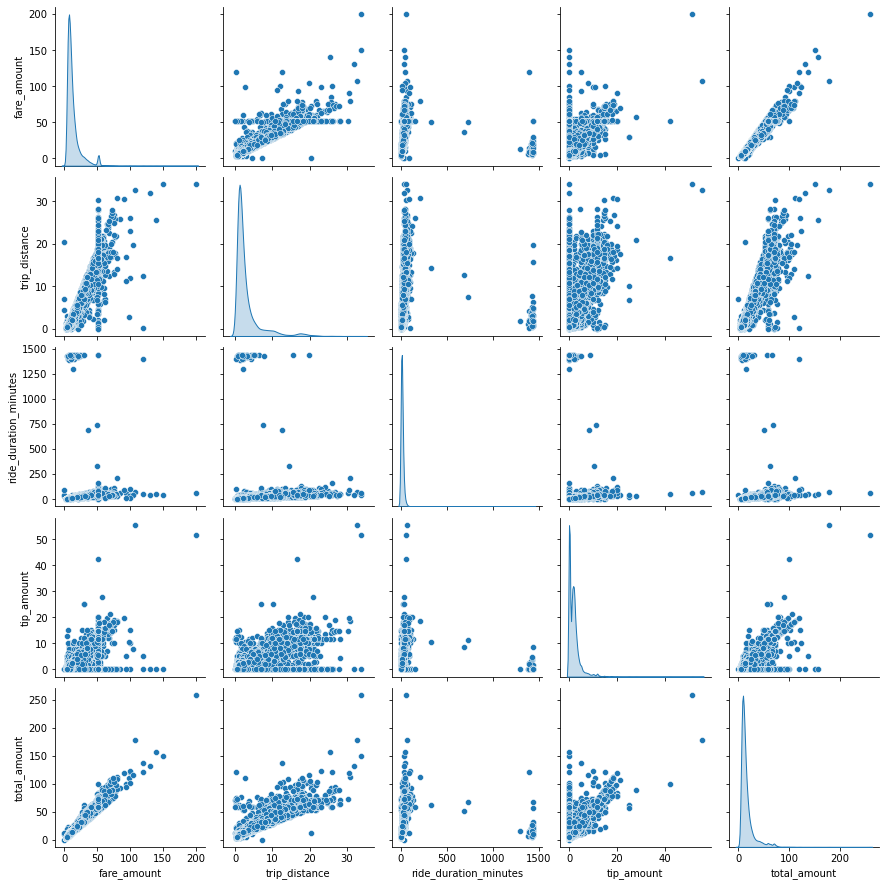

In [32]:
plt.figure(figsize=(20,10))

sns.pairplot(taxi_data[['fare_amount', 'trip_distance', 'ride_duration_minutes', 'tip_amount',
                        'total_amount', 'month', 'time_of_day']],
             diag_kind="kde", corner=False)
plt.show()

In [33]:
#Remove the rows with its ride duration greater than the Q3 (I will consider them outliers)
Q1 = taxi_data['ride_duration_minutes'].quantile(0.25)
Q3 = taxi_data['ride_duration_minutes'].quantile(0.75)
iqr = Q3 - Q1
upper_threshold = Q3 + (1.5 * iqr)
lower_threshold = Q3 - (1.5 * iqr)
print(f'Upper-threshold: {upper_threshold}   Lower-threshold: {lower_threshold}')

Upper-threshold: 36.0   Lower-threshold: 0.0


<Figure size 1440x720 with 0 Axes>

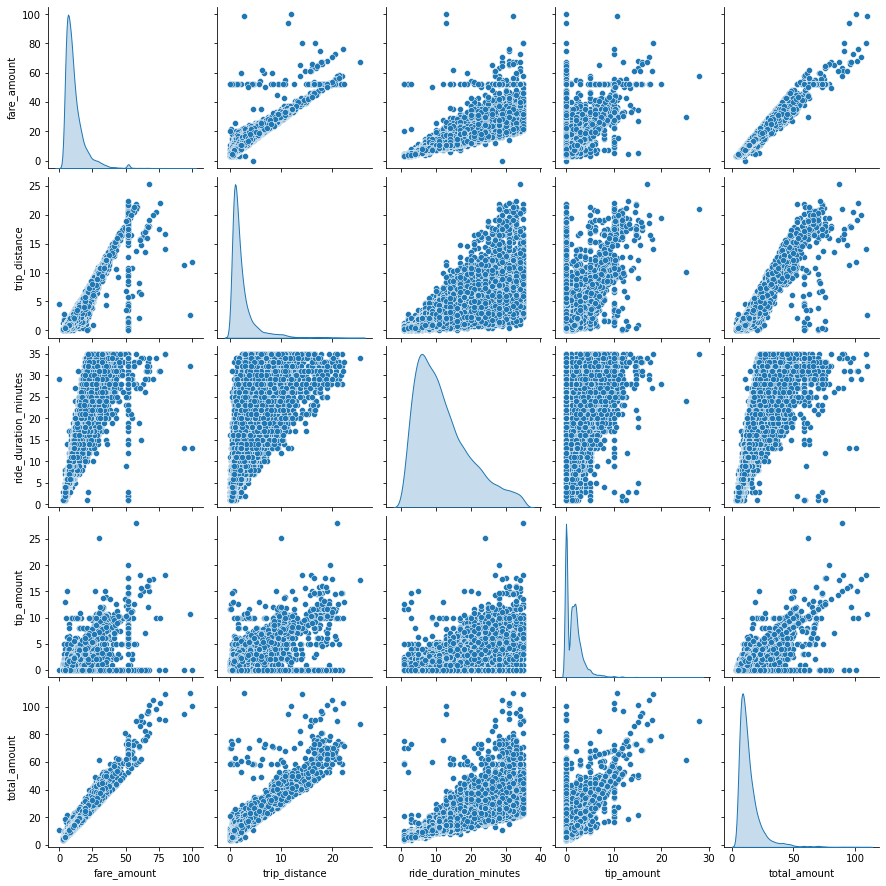

In [34]:
taxi_data_adj = taxi_data.copy()
taxi_data_adj = taxi_data_adj[(taxi_data_adj['ride_duration_minutes'] < upper_threshold) & 
                          (taxi_data_adj['ride_duration_minutes'] > lower_threshold)]

plt.figure(figsize=(20,10))

sns.pairplot(taxi_data_adj[['fare_amount', 'trip_distance', 'ride_duration_minutes',
                            'tip_amount', 'total_amount']],
             diag_kind="kde", corner=False)
plt.show()

In [35]:
#To get average distance and duration of ride, we need to group the taxi data trip journey first
taxi_data_adj.loc[:,'journey'] = taxi_data_adj['PULocationID'].astype(str) + ' ' + taxi_data_adj['DOLocationID'].astype(str)

grp_1 = taxi_data_adj.groupby('journey', as_index=False).trip_distance.mean().rename(
    columns={'trip_distance':'avg_trip_distance'})

taxi_data_adj = taxi_data_adj.merge(grp_1, on='journey', how='left')

#Testing it
taxi_data_adj[(taxi_data_adj['PULocationID']==100) & (taxi_data_adj['DOLocationID']==231)][['PULocationID','DOLocationID',
                                                                                            'avg_trip_distance']]

,PULocationID,DOLocationID,avg_trip_distance
0,100,231,3.406
4598,100,231,3.406
15558,100,231,3.406
18501,100,231,3.406
19273,100,231,3.406


In [36]:
#For average trip duration
grp_2 = taxi_data_adj.groupby('journey', as_index = False)['ride_duration_minutes'].mean().rename(
    columns = {'ride_duration_minutes':'avg_ride_duration'})
taxi_data_adj = taxi_data_adj.merge(grp_2, on = 'journey', how = 'left')

In [37]:
taxi_data_adj['avg_trip_distance'] = taxi_data_adj['avg_trip_distance'].apply(lambda x: round(x,2))
taxi_data_adj['avg_ride_duration'] = taxi_data_adj['avg_ride_duration'].apply(lambda x: round(x,2))
taxi_data_adj

,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime,journey,avg_trip_distance,avg_ride_duration
0,2,Morning,6,3.34,14,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,8,Sat,AM,March,2017-03-25 08:55:43,2017-03-25 09:09:47,100 231,3.41,17.40
1,1,Afternoon,1,1.80,26,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2,Tue,PM,April,2017-04-11 14:53:28,2017-04-11 15:19:58,186 43,3.16,21.25
2,1,Morning,1,1.00,7,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7,Fri,AM,December,2017-12-15 07:26:56,2017-12-15 07:34:08,262 236,0.88,6.77
3,2,Afternoon,1,3.70,30,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,1,Sun,PM,May,2017-05-07 13:17:59,2017-05-07 13:48:14,188 97,3.70,30.00
4,2,Night,1,4.37,16,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,11,Sat,PM,April,2017-04-15 23:32:20,2017-04-15 23:49:03,4 112,4.44,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21230,2,Night,1,0.89,9,1,N,229,170,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,10,Thu,PM,August,2017-08-10 22:20:04,2017-08-10 22:29:31,229 170,1.06,7.67
21231,2,Evening,3,0.61,3,1,N,48,186,2,4.0,1.0,0.5,0.00,0.0,0.3,5.80,5,Fri,PM,February,2017-02-24 17:37:23,2017-02-24 17:40:39,48 186,1.10,8.14
21232,2,Afternoon,1,0.42,4,1,N,107,234,2,4.5,0.0,0.5,0.00,0.0,0.3,5.30,2,Mon,PM,September,2017-09-04 14:54:14,2017-09-04 14:58:22,107 234,0.68,6.15
21233,2,Afternoon,1,2.36,11,1,N,68,144,1,10.5,0.0,0.5,1.70,0.0,0.3,13.00,12,Sat,PM,July,2017-07-15 12:56:30,2017-07-15 13:08:26,68 144,2.08,15.88


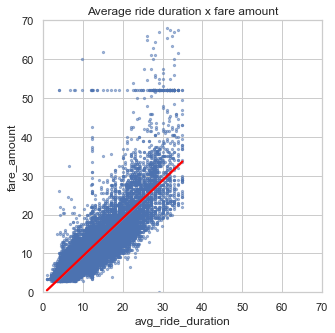

In [38]:
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=taxi_data_adj['avg_ride_duration'], y=taxi_data_adj['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Average ride duration x fare amount')
plt.show()

##### Out of all the continous variables the only show a bit of linearity with fare_amount suitable for independance variable is trip_distance but it is littered with numerous outliers.

##### So, I will try two types of regresssion; the first being :

##### Simple linear regression with average_distance as Independent variable

##### Multiple linear regression with one having variables (VendorID, passenger_count, average_distance, average_duration, time_of_day) and the second being; 


In [39]:
''' I got new info that the removal of row assigned 2 under RatecodeID field will bold well for the predictive models,
because it won't be useless in training the model as the fare amount of RatecodeID-2 is constant.
'''

ratecode_2 = taxi_data_adj[taxi_data_adj['RatecodeID'] == 2].drop(['avg_trip_distance','avg_ride_duration'], axis = 1)
remove = ratecode_2.index
taxi_data_adj = taxi_data_adj.drop(remove, axis = 0)
ratecode_2

,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime,journey
230,2,Night,1,18.93,29,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,11,Wed,PM,December,2017-12-06 23:37:08,2017-12-07 00:06:19,132 79
350,2,Night,1,17.99,29,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,11,Sun,PM,September,2017-09-24 23:45:45,2017-09-25 00:15:14,132 234
376,2,Afternoon,1,4.73,15,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,12,Mon,PM,June,2017-06-05 12:51:58,2017-06-05 13:07:35,228 88
529,2,Night,1,18.65,28,2,N,132,144,1,52.0,0.0,0.5,10.56,0.00,0.3,63.36,9,Wed,PM,November,2017-11-22 21:31:32,2017-11-22 22:00:25,132 144
647,2,Night,2,16.97,30,2,N,132,170,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27,10,Tue,PM,November,2017-11-07 22:15:00,2017-11-07 22:45:32,132 170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20246,1,Night,1,17.50,34,2,N,132,141,1,52.0,0.0,0.5,10.00,0.00,0.3,62.80,10,Mon,PM,August,2017-08-14 22:25:05,2017-08-14 22:59:22,132 141
20511,2,Evening,1,19.04,32,2,N,132,263,1,52.0,0.0,0.5,7.00,5.76,0.3,65.56,8,Sun,PM,March,2017-03-26 20:37:35,2017-03-26 21:10:32,132 263
20723,2,Night,1,17.11,34,2,N,132,161,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,9,Sat,PM,August,2017-08-05 21:05:35,2017-08-05 21:40:26,132 161
20761,2,Morning,1,17.49,29,2,N,164,132,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,9,Sat,AM,October,2017-10-28 09:22:21,2017-10-28 09:51:50,164 132



##### I did construct the simple linear regression with trip_distance as the X variable, and the its results of the model violated all the assumptions of the simple linear regression, so I scrapped it off.

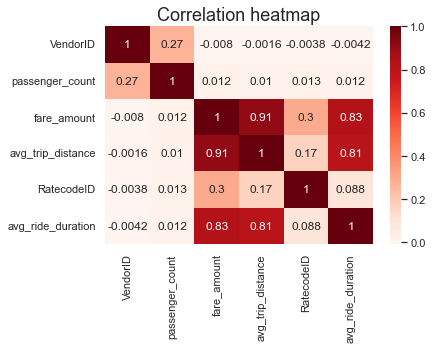

In [40]:
# The correlation of all all variables suspected to be impactful
model_data_1 = taxi_data_adj[['VendorID','passenger_count', 'fare_amount','avg_trip_distance',
                              'RatecodeID','avg_ride_duration','time_of_day']]

plt.figure(figsize = (6,4))
sns.heatmap(model_data_1.corr(method = 'pearson'), annot = True, cmap = 'Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

<Figure size 576x288 with 0 Axes>

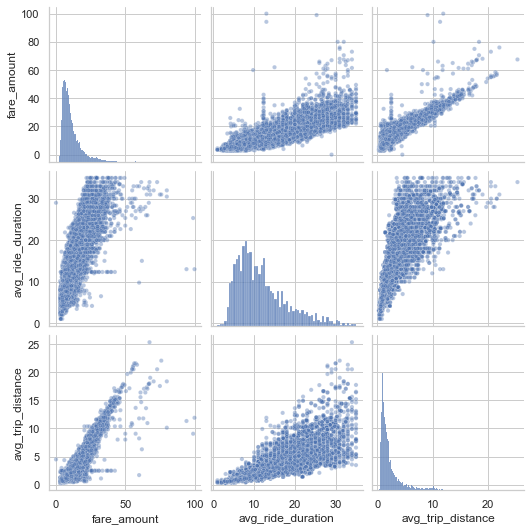

In [41]:
plt.figure(figsize =  (8,4))
sns.pairplot(model_data_1[['fare_amount', 'avg_ride_duration', 'avg_trip_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             )
plt.show()

In [42]:
# Remove the target column from the features
X = model_data_1.drop(columns=['fare_amount'])
X['VendorID'] = X['VendorID'].astype(str)
X = pd.get_dummies(X, drop_first=True)

# Set y variable
y = model_data_1[['fare_amount']]

# Display first few rows
X.head()

,passenger_count,avg_trip_distance,RatecodeID,avg_ride_duration,VendorID_2,time_of_day_Evening,time_of_day_Midnight,time_of_day_Morning,time_of_day_Night
0,6,3.41,1,17.40,1,0,0,1,0
1,1,3.16,1,21.25,0,0,0,0,0
2,1,0.88,1,6.77,0,0,0,1,0
3,1,3.70,1,30.00,1,0,0,0,0
4,1,4.44,1,14.00,1,0,0,0,1


In [43]:
# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [44]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

#train the model
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))


Coefficient of determination: 0.8871155015989176
R^2: 0.8871155015989176
MAE: 1.6293466053377788
MSE: 5.517852138694262
RMSE: 2.3490108851800287


In [46]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8750200938723276
R^2: 0.8750200938723276
MAE: 1.6458902009493934
MSE: 5.938688913622308
RMSE: 2.436942533918744


Time to test if the data complies to the multi-regression assumption
1. Linearity of the data points (actual and predicted)
2. Normality of the residuals
3. Homoscedasticity of the residuals

In [47]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
1016,14.5,15.643188,-1.143188
10255,8.0,8.520255,-0.520255
18121,5.0,5.330013,-0.330013
452,5.5,5.578665,-0.078665
9204,19.0,19.785496,-0.785496


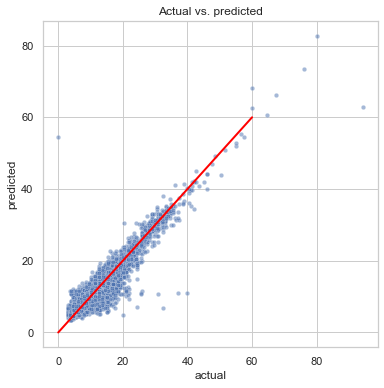

In [48]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

The mean is : {-0.00795972397474823}


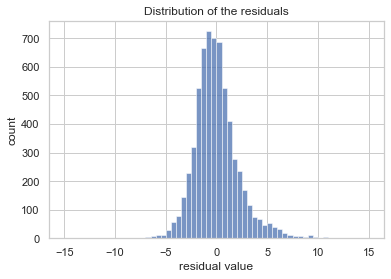

In [49]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')

r = {results['residual'].mean()}
print(f'The mean is : {r}')

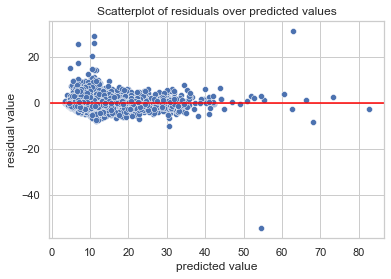

In [50]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [51]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
print (coefficients)

# 1. Calculate SD of `mean_distance` in X_train data
std = X_train['avg_trip_distance'].std()
print(f'The STD of avg_trip_distance: {std}')

# 2. Divide the model coefficient by the standard deviation
unscale = round(float(coefficients['avg_trip_distance']/ std), 2)
print(f'The unscaled coeffient of fare amount for average trip distance: ${unscale}')

The STD of avg_trip_distance: 2.274158489935097
The unscaled coeffient of fare amount for average trip distance: $2.0


### Conclusions from the MLR model:

#### The score of the model's performance is acceptable and the data upheld every single assumptions of the model, there's even

#### another incredible insight where the mean amount of fare for every 1 mile of distance travelled increase by - $2.14 or

#### every 3.57 miles traveled, the fare increased by a mean of $7.13

In [52]:
#Time to predict the full dataset with the variables used to train the regression model - model_data_1, then test its performerance

X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

print('R^2:', r2_score(y, y_preds_full))
print('MAE:', mean_absolute_error(y, y_preds_full))
print('MSE:', mean_squared_error(y, y_preds_full))
print('RMSE:',np.sqrt(mean_squared_error(y, y_preds_full)))

R^2: 0.8835596789405817
MAE: 1.6343096840212634
MSE: 5.644103171172676
RMSE: 2.3757321337163995


In [53]:
model_predict_1 = model_data_1[['RatecodeID','avg_trip_distance', 'avg_ride_duration']].copy()
model_predict_1['RatecodeID'] = model_predict_1['RatecodeID'].astype(int)
model_predict_1['predicted_fare'] = y_preds_full
model_predict_1['predicted_fare'] = model_predict_1['predicted_fare'].astype(float)

model_predict_1

,RatecodeID,avg_trip_distance,avg_ride_duration,predicted_fare
0,1,3.41,17.40,14.942286
1,1,3.16,21.25,16.219455
2,1,0.88,6.77,6.453806
3,1,3.70,30.00,20.080233
4,1,4.44,14.00,15.389042
...,...,...,...,...
21230,1,1.06,7.67,6.566729
21231,1,1.10,8.14,7.334115
21232,1,0.68,6.15,6.264304
21233,1,2.08,15.88,12.236526


### Classification Models

##### Purpose: Is to find ways to generate more revenue for taxi cab drivers.

##### Goal: Is to predict whether or not a customer is a generous tipper.


The word 'generous' is quite vague, so any customer that gives out 20% or more of the total fee is considered 'generous' and we will use factors like time of day, rush hour,  

In [54]:
# I will add the rows I previously removed before training MLR model to the original dataset, after add necessary features
grp_3 = ratecode_2.groupby('journey', as_index=False).mean(numeric_only=True).rename(
    columns={'trip_distance':'avg_trip_distance',
            'ride_duration_minutes':'avg_ride_duration'})
grp_3 = grp_3[['journey','avg_trip_distance', 'avg_ride_duration']]

grp_3['avg_trip_distance'] = grp_3['avg_trip_distance'].apply(lambda x: round(x,2))
grp_3['avg_ride_duration'] = grp_3['avg_ride_duration'].apply(lambda x: round(x,2))

ratecode_2 = ratecode_2.merge(grp_3, on='journey', how='left')

model_predict_1 = pd.concat([model_predict_1,ratecode_2[['RatecodeID', 'avg_trip_distance', 'avg_ride_duration']]])
model_predict_1.loc[model_predict_1['predicted_fare'].isna(),'predicted_fare'] = 52.0
model_predict_1

,RatecodeID,avg_trip_distance,avg_ride_duration,predicted_fare
0,1,3.41,17.40,14.942286
1,1,3.16,21.25,16.219455
2,1,0.88,6.77,6.453806
3,1,3.70,30.00,20.080233
4,1,4.44,14.00,15.389042
...,...,...,...,...
130,2,18.03,32.00,52.000000
131,2,18.78,29.33,52.000000
132,2,17.68,31.00,52.000000
133,2,16.46,27.75,52.000000


In [55]:
#Merging the datasets (one with ratecodeID = 2 & the other != 2) to get a complete dataset without the outliers in ride_dur_min
taxi_data_adj = pd.concat([taxi_data_adj, ratecode_2])
taxi_data_adj['predicted_fare'] = model_predict_1['predicted_fare']

#Basic engineering of the features before constructing the models

taxi_data_adj['tip_percent'] = round(taxi_data_adj['tip_amount'] / (
    taxi_data_adj['total_amount'] - taxi_data_adj['tip_amount']), 3)#Showing the tip percentage

taxi_data_adj['generous'] = taxi_data_adj['tip_percent']
taxi_data_adj['generous'] = (taxi_data_adj['generous'] >= 0.2)
taxi_data_adj['generous'] = taxi_data_adj['generous'].astype(int)

def rush_hour(taxi_data_adj):
    if 6 >= taxi_data_adj['pickup_hour'] < 10 and taxi_data_adj['pickup_period'] == 'AM':
        val = 1
    elif 4 >= taxi_data_adj['pickup_hour'] < 8 and taxi_data_adj['pickup_period'] == 'PM':
        val = 1
    else:
        val = 0
    return val

taxi_data_adj['rush_hour'] = taxi_data_adj.apply(rush_hour, axis = 1)

taxi_data_adj

,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime,journey,avg_trip_distance,avg_ride_duration,predicted_fare,tip_percent,generous,rush_hour
0,2,Morning,6,3.34,14,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,8,Sat,AM,March,2017-03-25 08:55:43,2017-03-25 09:09:47,100 231,3.41,17.40,14.942286,0.200,1,0
1,1,Afternoon,1,1.80,26,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,2,Tue,PM,April,2017-04-11 14:53:28,2017-04-11 15:19:58,186 43,3.16,21.25,16.219455,0.238,1,1
2,1,Morning,1,1.00,7,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7,Fri,AM,December,2017-12-15 07:26:56,2017-12-15 07:34:08,262 236,0.88,6.77,6.453806,0.199,0,0
3,2,Afternoon,1,3.70,30,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,1,Sun,PM,May,2017-05-07 13:17:59,2017-05-07 13:48:14,188 97,3.70,30.00,20.080233,0.300,1,1
4,2,Night,1,4.37,16,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,11,Sat,PM,April,2017-04-15 23:32:20,2017-04-15 23:49:03,4 112,4.44,14.00,15.389042,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1,Night,1,17.50,34,2,N,132,141,1,52.0,0.0,0.5,10.00,0.00,0.3,62.80,10,Mon,PM,August,2017-08-14 22:25:05,2017-08-14 22:59:22,132 141,18.03,32.00,52.000000,0.189,0,0
131,2,Evening,1,19.04,32,2,N,132,263,1,52.0,0.0,0.5,7.00,5.76,0.3,65.56,8,Sun,PM,March,2017-03-26 20:37:35,2017-03-26 21:10:32,132 263,18.78,29.33,52.000000,0.120,0,0
132,2,Night,1,17.11,34,2,N,132,161,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,9,Sat,PM,August,2017-08-05 21:05:35,2017-08-05 21:40:26,132 161,17.68,31.00,52.000000,0.000,0,0
133,2,Morning,1,17.49,29,2,N,164,132,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,9,Sat,AM,October,2017-10-28 09:22:21,2017-10-28 09:51:50,164 132,16.46,27.75,52.000000,0.250,1,0


In [56]:
# Extracting 
drop_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'trip_distance', 'store_and_fwd_flag',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

taxi_data_adj1 = taxi_data_adj.drop(drop_cols, axis=1)

# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID', 'payment_type']

# 2. Convert each column to string
for col in cols_to_str:
    taxi_data_adj1[col] = taxi_data_adj1[col].astype('str')

taxi_data_adj1 = pd.get_dummies(taxi_data_adj1, drop_first=True)
# Get class balance of 'generous' col
generous = taxi_data_adj1['generous'].value_counts(normalize=True)
print(f"The proportion of values of 'generous' feature: {dict(generous)}.")
taxi_data_adj1.info()

The proportion of values of 'generous' feature: {0: 0.650294325406169, 1: 0.34970567459383095}. /n
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21235 entries, 0 to 134
Columns: 4224 entries, passenger_count to journey_97 97
dtypes: float64(3), int32(2), int64(3), uint8(4216)
memory usage: 86.7 MB


#### The "generous" (tipped ≥ 20%) customers is nearly half of "not generous"(tipped < 20%) customers in this dataset . The dataset is clearly not  balanced, but it doesn't seem to require any downsampling and upsampling.

To determine a metric, consider the cost of both kinds of model error:

False positives (the model predicts a tip ≥ 20%, but the customer does not give one).

False negatives (the model predicts a tip < 20%, but the customer gives more).

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more—even when the original customer would have tipped generously.

#### The stakes are relatively even. I want to help taxi drivers make more money, but I don't want this to anger customers.

In [65]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier

In [66]:
#Time to fit the Random Forest model
x = taxi_data_adj1.drop('generous', axis = 1)

y = taxi_data_adj1['generous']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [67]:
rf = RandomForestClassifier(random_state = 42)

cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }
scoring = ['accuracy', 'precision', 'recall', 'f1']

#Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'f1')

In [68]:
%%time
rf1.fit(x_train, y_train)

CPU times: total: 1h 6min 44s
Wall time: 1h 7min 40s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [69]:
rf1.best_score_

0.7293974994901201

In [70]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [76]:
# Make sure the pickle is only run once, to avoid duplicates
path = r'C:\Users\HP\Desktop\Eduaction\Google Advanced Data Analytics\Taxi data\pickle'

#Storing the scorings in a pickle
import pickle 

In [77]:
def write_pickle(path, model_object, save_name:str):
 
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
write_pickle(path, rf1, 'Taxi_data_Classifier_Model')

In [78]:
def read_pickle(path, saved_model_name:str):

    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [79]:

def generate_results(model_name:str, model_object=None, metric:str=None, preds=None, y_test_data=None):
    """
    Generate performance metrics for a model.
    
    If model_object is provided, it extracts cross-validation scores.
    If preds and y_test_data are provided, it calculates test scores.

    Parameters:
    - model_name (str): Name of the model.
    - model_object (GridSearchCV or similar, optional): Trained model with cv_results_.
    - metric (str, optional): The metric to optimize in cross-validation ('precision', 'recall', 'f1', or 'accuracy').
    - preds (numpy array, optional): Model predictions on test data.
    - y_test_data (numpy array, optional): Actual labels for test data.

    Returns:
    - Pandas DataFrame with precision, recall, f1, and accuracy scores.
    """

    if model_object is not None and metric is not None:
        # Extract best cross-validation results
        metric_dict = {'precision': 'mean_test_precision',
                       'recall': 'mean_test_recall',
                       'f1': 'mean_test_f1',
                       'accuracy': 'mean_test_accuracy'}
        
        cv_results = pd.DataFrame(model_object.cv_results_)
        best_index = cv_results[metric_dict[metric]].idxmax()
        best_estimator_results = cv_results.iloc[best_index, :]

        f1 = best_estimator_results.mean_test_f1
        recall = best_estimator_results.mean_test_recall
        precision = best_estimator_results.mean_test_precision
        accuracy = best_estimator_results.mean_test_accuracy

    elif preds is not None and y_test_data is not None:
        # Compute test set performance
        accuracy = accuracy_score(y_test_data, preds)
        precision = precision_score(y_test_data, preds)
        recall = recall_score(y_test_data, preds)
        f1 = f1_score(y_test_data, preds)
    
    else:
        raise ValueError("Either provide (model_object, metric) for CV results OR (preds, y_test_data) for test scores.")

    # Create a results table
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]})

    return table

In [80]:
cv_result = read_pickle(path, 'Taxi_data_Classifier_Model')
cv_results = generate_results('RF CV', model_object = cv_result, metric = 'f1')

rf_preds = rf1.best_estimator_.predict(x_test)
rf_preds_results = generate_results('RF test', preds = rf_preds, y_test_data = y_test)

class_results = pd.concat([cv_results, rf_preds_results], axis = 0)
class_results

,model,precision,recall,F1,accuracy
0,RF CV,0.684862,0.780173,0.729397,0.797563
0,RF test,0.692810,0.785185,0.736111,0.803155


In [81]:
#The XGBoost model
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb = XGBClassifier(objective='binary:logistic', random_state=42)
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb1 = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 4, refit = 'f1')

In [82]:
%%time
xgb1.fit(x_train, y_train)

CPU times: total: 29min 10s
Wall time: 8min 11s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

In [83]:
print(f' The best score for the XGBoost is: {xgb1.best_score_}. \n The best hyperparameters are: {xgb1.best_params_}')

 The best score for the XGBoost is: 0.7051662475369519. 
 The best hyperparameters are: {'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 500}


In [84]:
#Comparing the scoring for the XGB model trained the Taxi data
write_pickle(path, xgb1, 'Taxi data XGB model')
xgb_cv_result = read_pickle(path, 'Taxi data XGB model')

xgb_cv_results = generate_results('XGB cv', model_object = xgb_cv_result, metric = 'f1')

xgb_preds = xgb1.best_estimator_.predict(x_test)
xgb_preds_results = generate_results('XGB test', preds = xgb_preds, y_test_data = y_test)

class2_results = pd.concat([class_results,xgb_cv_results, xgb_preds_results], axis = 0)
class2_results

,model,precision,recall,F1,accuracy
0,RF CV,0.684862,0.780173,0.729397,0.797563
0,RF test,0.692810,0.785185,0.736111,0.803155
0,XGB cv,0.681992,0.730011,0.705166,0.786496
0,XGB test,0.693408,0.750842,0.720983,0.796798


The f1 score of the Random Forest seems to preformed better than XGBoost, though their difference isn't that significant

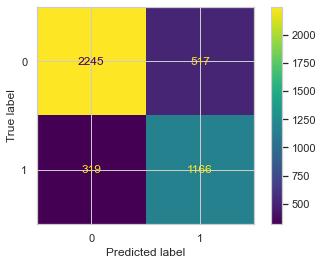

In [85]:
# A confusion matxix to evaluate the Random Forest predictions

cm = confusion_matrix(y_test, rf_preds, labels = rf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format = None);

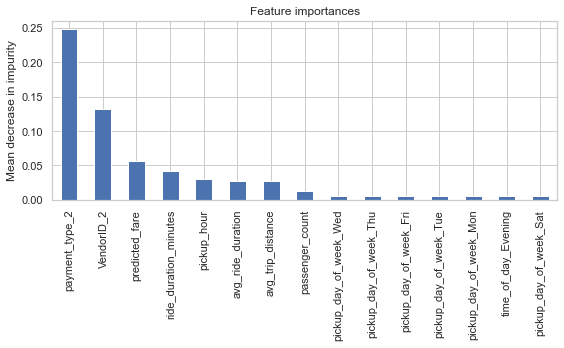

In [86]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=x_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();